# Classification with Deep Learning 
---

With the term **Machine Learning** (ML) we define a set of algorithms and methods that provide a machine with the ability to learn automatically and improve from experience without being explicitly programmed.
When we have labeled data, we can use the label to guide the learning process, and this is called **Supervised learning**. If data are not labeled, it means that we don't have a guide or a supervision, and this is called **Unsupervised learning**.
Within Supervised learning we can have two different kind if problems:
 - **Regression problem**: the task of predicting a contineous quantity,  
 - **Classification problem**: the task of predicting a label or a class (discrete values).

This tutorial will show you how to perform classification with deep Neural Network (NN) on images. We will work with two public datasets, and we will see a binary classification and a multi-class classification problem. 

In order to start working on the notebook, click on the following button, this will open this page in the Colab environment and you will be able to execute the code on your own. It might ask to accesss with your gmail account and accept the terms and conditions, please accept them all so that you can start the tutorial.

****** Modify link *******

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/donatellacea/DL_tutorials/blob/main/notebooks/DL_Classification_tutorial.ipynb)


## Setup the environment

If you already did this step for the Tensorflow Playground tutorial, you can skip the setup section and start with the Binary Classificatio. Otherwise, complete the next step before starting the tutorial.

Now that you are visualizing the notebook in Colab, run the next cell, in order to create a folder in your Google Drive. Alle the files for this tutorial, will be uploaded in this folder.

In [ ]:
# Create a folder in your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Execute the next cells to clone the repository from GitHub, so the important files and notebooks for this tutorial will be downloaded in your working folder on the Drive that you created in the previous step.

In [ ]:
%cd drive/MyDrive
!pwd

In [ ]:
!git clone https://github.com/donatellacea/DL_tutorials

In [ ]:
%cd DL_tutorials

In [ ]:
!pip install alive_progress

In [1]:
# Run this cell to import the main packages we will use
import pandas as pd
import numpy as np
import os
import glob
import sklearn
import random
random.seed(1)
import matplotlib.pyplot as plt 
import PIL
import plotly.graph_objects as go
from skimage import io 
from alive_progress import alive_bar

import torch
torch.manual_seed(0)
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

## Binary Classification
---

In this problem, we will use the Lung CT scans dataset in order to predict whether the patient has Codiv-19 or not. Since the output can be positive or negative, this is a classic example of **binary classification**. 

### Dataset 
The dataset, available on Kaggle (https://www.kaggle.com/datasets/luisblanche/covidct), will be downloaded in your google drive folder that we will create in the first step of the tutorial.

It counts in a total of 746 images divided as follows:
- 397 No Covid
- 349 Covid

The images, i.e. CT scans, are obtained through Computed Tomography, a medical imaging technique used in radiology (x-ray) to obtain detailed internal images of the body noninvasively for diagnostic purposes. Only with proper training is it possible to interpret the scans, so without a radiology/medical background, it is tough to understand the presence of Covid-19 from the scan. But we will see that a well-trained NN can help the technicians and doctors diagnose this kind of disease.

Run the next cell to download the data, you should see a folder that contains two sub folder one for each class, Covid and No-Covid.

In [ ]:
#from google.colab import files
#files.upload()   

In [ ]:
#!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

In [2]:
# Create the path to each folder
path = '/Users/donatella.cea/Documents/Seminar_June/Dataset_CT_lungs' ##### Change path
pos_files = glob.glob(os.path.join(path, "CT_COVID",'*.*'))
neg_files = glob.glob(os.path.join(path, 'CT_NonCOVID','*.*'))
images = pos_files + neg_files
num_total = len(images)

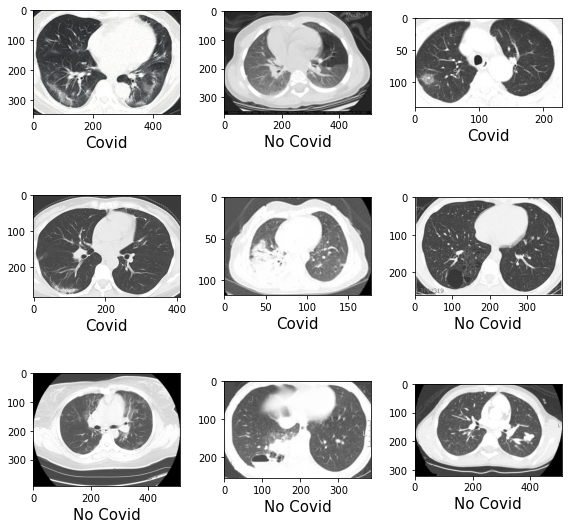

In [3]:
# Plot 9 random CT scans from the dataset to see how do they look like
# random.seed(7)
plt.subplots(3, 3, figsize=(8, 8)) 
num_fig = 9
ax_name = ['No Covid'] * num_fig
for i, number in enumerate(random.sample(range(num_total), num_fig)):
    im = PIL.Image.open(images[number])
    arr = np.array(im)
    plt.subplot(3, 3, i + 1)
    if 'CT_COVID' in images[number]:        
        ax_name[i] = 'Covid'
    plt.xlabel(ax_name[i], fontsize=15)
    plt.imshow(arr, cmap="gray", vmin=0, vmax=255)
plt.tight_layout()
plt.show()